In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 4.9 MB/s 
     |████████████████████████████████| 160 kB 56.1 MB/s 
     |████████████████████████████████| 166.7 MB 16 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=7f85617a3d0e56fe6db2234bafbca53754eb3b5a7f57e8c374e423f1e132be4a
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


# Step 1: Import Libraries

In [ ]:
# Import Libraries

import time
import xlwt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import sqrt
from numpy import where
from numpy import argmax
from xlwt import Workbook
from sklearn.svm import SVC
from keras.layers import Dense
from sklearn.metrics import auc
from tpot import TPOTClassifier
from collections import Counter
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn import preprocessing
from prettytable import PrettyTable 
from sklearn import model_selection
from keras.models import Sequential
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from astropy.table import Table, Column
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Step 2: Read Dataset

In [ ]:
# Load Dataset

data = pd.read_excel('drive/My Drive/Colab Notebooks/WisconsinDataset/Forms_cleaned.xlsx', 'form1')

print('\n\nDataset:')
print('========\n')
data



Dataset:



,EID,FormID,Flagged,Attempt,tot_time,iresp.1,iresp.2,iresp.3,iresp.4,iresp.5,iresp.6,iresp.7,iresp.8,iresp.9,iresp.10,iresp.11,iresp.12,iresp.13,iresp.14,iresp.15,iresp.16,iresp.17,iresp.18,iresp.19,iresp.20,iresp.21,iresp.22,iresp.23,iresp.24,iresp.25,iresp.26,iresp.27,iresp.28,iresp.29,iresp.30,iresp.31,iresp.32,iresp.33,iresp.34,iresp.35,...,idur.131,idur.132,idur.133,idur.134,idur.135,idur.136,idur.137,idur.138,idur.139,idur.140,idur.141,idur.142,idur.143,idur.144,idur.145,idur.146,idur.147,idur.148,idur.149,idur.150,idur.151,idur.152,idur.153,idur.154,idur.155,idur.156,idur.157,idur.158,idur.159,idur.160,idur.161,idur.162,idur.163,idur.164,idur.165,idur.166,idur.167,idur.168,idur.169,idur.170
0,e100001,form1,0,5,10133,1,1,3.0,1,2,1.0,4,4.0,1,1,3,1.0,2,2.0,4,1.0,2,1.0,4,3,3.0,3.0,4,3,3.0,1.0,2.0,1.0,1.0,2.0,4.0,2,1,2.0,1.0,...,85,47,60,46,98,106,92,63,103,48,42,66,26,57,14,63,45,28,21,15,64,23,61,28,35,28,64,122,20,18,17,102,55,50,17,28,53,82,100,21
1,e100002,form1,1,1,12409,1,3,3.0,1,1,3.0,4,4.0,2,4,3,2.0,1,2.0,3,4.0,2,2.0,3,3,3.0,3.0,3,1,3.0,2.0,4.0,1.0,4.0,4.0,2.0,1,1,4.0,1.0,...,191,48,52,108,69,59,93,133,136,94,139,43,23,82,56,32,77,87,75,34,98,30,107,42,126,31,47,51,83,64,22,121,114,44,36,53,120,93,87,29
2,e100003,form1,1,1,12457,2,3,4.0,4,2,3.0,3,4.0,2,3,1,3.0,4,4.0,4,1.0,2,1.0,3,2,4.0,3.0,4,3,4.0,1.0,2.0,4.0,3.0,3.0,1.0,4,4,1.0,3.0,...,62,54,89,72,68,78,77,77,170,48,84,62,52,122,41,98,38,49,52,27,62,18,78,47,109,47,44,72,23,16,73,34,92,83,50,30,63,96,79,48
3,e100004,form1,1,3,11389,1,1,1.0,4,2,1.0,4,4.0,4,4,3,4.0,4,1.0,4,2.0,2,3.0,3,2,2.0,3.0,3,1,1.0,1.0,2.0,3.0,2.0,2.0,4.0,3,2,4.0,3.0,...,79,69,105,75,60,64,77,54,73,50,60,29,37,72,34,78,74,93,59,39,39,30,34,35,62,33,47,87,83,45,30,93,49,26,57,41,59,41,84,17
4,e100005,form1,1,5,13669,1,1,2.0,4,2,2.0,1,4.0,2,1,4,NaN,2,1.0,4,4.0,1,2.0,3,3,3.0,3.0,3,4,4.0,1.0,NaN,1.0,1.0,NaN,3.0,2,4,4.0,1.0,...,171,29,92,56,55,189,146,108,151,71,57,31,33,138,131,92,110,30,57,20,34,34,72,56,96,46,119,66,133,34,11,0,58,127,63,68,164,74,63,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,e101632,form1,0,1,8760,1,1,3.0,3,2,2.0,3,1.0,4,1,4,4.0,4,4.0,3,1.0,2,1.0,1,1,3.0,3.0,3,4,4.0,3.0,4.0,1.0,3.0,1.0,3.0,2,2,4.0,3.0,...,43,59,61,70,24,67,46,41,86,47,54,24,46,36,68,39,66,33,34,13,38,35,37,23,64,20,19,72,63,15,10,72,40,10,10,52,56,47,61,19
1632,e101633,form1,0,1,10568,1,1,3.0,3,2,2.0,3,1.0,1,1,4,3.0,4,4.0,3,1.0,2,1.0,1,1,3.0,3.0,3,4,4.0,3.0,1.0,1.0,3.0,1.0,3.0,2,2,4.0,3.0,...,62,42,22,26,35,44,69,69,92,79,79,18,17,48,230,58,44,90,60,18,74,49,149,14,28,38,27,128,52,8,11,116,45,11,7,116,79,59,48,40
1633,e101634,form1,0,1,12449,1,1,3.0,3,2,2.0,3,1.0,3,1,4,1.0,4,4.0,3,1.0,3,1.0,1,1,2.0,3.0,3,4,4.0,3.0,1.0,1.0,3.0,1.0,3.0,2,2,4.0,3.0,...,165,31,52,35,27,80,47,59,78,90,137,42,35,35,52,109,75,114,36,33,34,168,62,68,44,18,36,144,98,11,47,164,28,11,30,54,19,27,43,14
1634,e101635,form1,0,1,8209,1,1,3.0,3,2,2.0,3,1.0,4,1,4,3.0,2,4.0,3,1.0,2,1.0,1,1,3.0,3.0,3,4,4.0,3.0,1.0,1.0,3.0,1.0,3.0,2,2,4.0,3.0,...,42,36,12,33,26,57,49,38,123,39,90,13,41,38,17,36,41,30,26,32,50,18,69,45,30,24,27,50,24,43,14,45,32,14,28,17,18,109,94,14


# Step 3: Understand Datset

In [ ]:
# Understand Dataset

print("\n\nAttributes of Dataset:")
print("======================\n")

print("\nName of Dataset: Forms_cleaned")
print("==============================\n")

print("\nNumber of Rows:", len(data))
print("====================\n")

print("\nNumber of Columns:", len(data.columns))
print("======================\n")



Attributes of Dataset:


Name of Dataset: Forms_cleaned


Number of Rows: 1636


Number of Columns: 515



# Step 4: Pre-Process Dataset

In [ ]:
# Pre-Processing

data.tail()
data.drop(data.loc[:, 'iresp.1':'iresp.170'], inplace = True, axis = 1) 
data_final = data

In [ ]:
# Count Null Values

print(data_final.isnull().sum())
print(data_final.shape)

EID         0
FormID      0
Flagged     0
Attempt     0
tot_time    0
           ..
idur.166    0
idur.167    0
idur.168    0
idur.169    0
idur.170    0
Length: 345, dtype: int64
(1636, 345)


In [ ]:
# Drop Null Values

data_final.dropna(inplace=True)
print(data_final.isnull().sum())
print(data_final.shape)

EID         0
FormID      0
Flagged     0
Attempt     0
tot_time    0
           ..
idur.166    0
idur.167    0
idur.168    0
idur.169    0
idur.170    0
Length: 345, dtype: int64
(1636, 345)


In [ ]:
# Time

data_final['mean_idur'] = data_final.loc[:, 'idur.1':'idur.170'].mean(axis=1)
data_final['median_idur'] = data_final.loc[:, 'idur.1':'idur.170'].median(axis=1)
data_final['max_idur'] = data_final.loc[:, 'idur.1':'idur.170'].max(axis=1)
data_final['min_idur'] = data_final.loc[:, 'idur.1':'idur.170'].min(axis=1)

# Correct Answers

data_final['iraw_score'] = data_final.loc[:, 'iraw.1':'iraw.170'].sum(axis=1)
data_final['iraw_score_pct'] = data_final['iraw_score']/170
data_final

,EID,FormID,Flagged,Attempt,tot_time,iraw.1,iraw.2,iraw.3,iraw.4,iraw.5,iraw.6,iraw.7,iraw.8,iraw.9,iraw.10,iraw.11,iraw.12,iraw.13,iraw.14,iraw.15,iraw.16,iraw.17,iraw.18,iraw.19,iraw.20,iraw.21,iraw.22,iraw.23,iraw.24,iraw.25,iraw.26,iraw.27,iraw.28,iraw.29,iraw.30,iraw.31,iraw.32,iraw.33,iraw.34,iraw.35,...,idur.137,idur.138,idur.139,idur.140,idur.141,idur.142,idur.143,idur.144,idur.145,idur.146,idur.147,idur.148,idur.149,idur.150,idur.151,idur.152,idur.153,idur.154,idur.155,idur.156,idur.157,idur.158,idur.159,idur.160,idur.161,idur.162,idur.163,idur.164,idur.165,idur.166,idur.167,idur.168,idur.169,idur.170,mean_idur,median_idur,max_idur,min_idur,iraw_score,iraw_score_pct
0,e100001,form1,0,5,10133,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,...,92,63,103,48,42,66,26,57,14,63,45,28,21,15,64,23,61,28,35,28,64,122,20,18,17,102,55,50,17,28,53,82,100,21,56.323529,50.0,143,14,54,0.317647
1,e100002,form1,1,1,12409,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,...,93,133,136,94,139,43,23,82,56,32,77,87,75,34,98,30,107,42,126,31,47,51,83,64,22,121,114,44,36,53,120,93,87,29,69.158824,63.0,202,11,55,0.323529
2,e100003,form1,1,1,12457,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,...,77,77,170,48,84,62,52,122,41,98,38,49,52,27,62,18,78,47,109,47,44,72,23,16,73,34,92,83,50,30,63,96,79,48,69.547059,65.5,179,16,61,0.358824
3,e100004,form1,1,3,11389,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,...,77,54,73,50,60,29,37,72,34,78,74,93,59,39,39,30,34,35,62,33,47,87,83,45,30,93,49,26,57,41,59,41,84,17,62.882353,62.0,154,12,61,0.358824
4,e100005,form1,1,5,13669,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,1,1,0,1,0,...,146,108,151,71,57,31,33,138,131,92,110,30,57,20,34,34,72,56,96,46,119,66,133,34,11,0,58,127,63,68,164,74,63,17,76.547059,69.0,189,0,62,0.364706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,e101632,form1,0,1,8760,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,...,46,41,86,47,54,24,46,36,68,39,66,33,34,13,38,35,37,23,64,20,19,72,63,15,10,72,40,10,10,52,56,47,61,19,48.658824,43.0,152,8,156,0.917647
1632,e101633,form1,0,1,10568,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,69,69,92,79,79,18,17,48,230,58,44,90,60,18,74,49,149,14,28,38,27,128,52,8,11,116,45,11,7,116,79,59,48,40,59.335294,49.0,230,7,153,0.900000
1633,e101634,form1,0,1,12449,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,47,59,78,90,137,42,35,35,52,109,75,114,36,33,34,168,62,68,44,18,36,144,98,11,47,164,28,11,30,54,19,27,43,14,69.894118,47.0,322,7,154,0.905882
1634,e101635,form1,0,1,8209,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,49,38,123,39,90,13,41,38,17,36,41,30,26,32,50,18,69,45,30,24,27,50,24,43,14,45,32,14,28,17,18,109,94,14,45.376471,34.0,258,10,152,0.894118


# Step 5: Feature Selection

In [ ]:
# iraw_idur_OEF (both+OEF)

col_features = ['Attempt', 'tot_time', 'mean_idur', 'median_idur', 'max_idur', 'min_idur', 'iraw_score_pct']

for x in range(1,171):
    col_features.append('idur.'+str(x))

for i in range(1,171):
    col_features.append('iraw.'+str(i))

X = data_final.loc[:, col_features]
Y = data_final.Flagged    

In [ ]:
# Count Values

counter = Counter(Y)
print(counter)

Counter({0: 1590, 1: 46})


# Step 6: Feature Scaling

In [ ]:
# Scaling

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [ ]:
# SMOTE and RandomUnderSampler (for balancing data)

over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)

<center>
    <br>
        <br>
            <br>
                <h5 style = "color:blue">====================================================================</h5>
                <h2 style = "color:green">Ensemble Methods</h2>
                <h5 style = "color:blue">====================================================================</h5>
            <br>
        <br>
    <br>
</center>

<div class="alert alert-info">
<b>We have Trainined the following 3 Ensemble Methods</b>
<div class="alert alert-success">
<b>
    <code>(1)</code> Bagging Classifier <br>
    <p>Note: <br>Bootstrap aggregating, also called bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting.</p><br>
    <code>(2)</code> Boosting Classifer <br>
    <p>Note: <br>In machine learning, boosting is an ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones.</p><br>
    <code>(3)</code> Voting Classifier <br>
    <p>Note: <br>A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.</p><br>
</b>
</div>
</div>

# (1) Bagging

In [ ]:
# Bagging

kfold = model_selection.KFold(n_splits = 4)

bagging_model = BaggingClassifier(n_estimators=100)
x_all, y_all = pipeline.fit_resample(X_scaled, Y)
#bagging_results = model_selection.cross_val_score(bagging_model, X_scaled, Y, cv=kfold)
bagging_results = model_selection.cross_val_score(bagging_model, x_all, y_all, cv=kfold)
bagging_results = bagging_results.mean()
print("\n\nMean Score of Bagging:")
print("======================\n")
print(bagging_results)
print("\n======================\n")



Mean Score of Bagging:

0.9549266247379455




### Evalute the performace of Bagging

In [ ]:
def evaluate_model(data_x, data_y):
    k_fold = model_selection.KFold(n_splits = 4)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        # kfold
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        # oversampling
        train_x, train_y = pipeline.fit_resample(train_x, train_y)
        test_x, test_y = pipeline.fit_resample(test_x, test_y)

        # Fit, Predict
        bagging_model.fit(train_x, train_y)
        y_pred = bagging_model.predict(test_x)

        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, test_y)

    return predicted_targets, actual_targets



Accuracy Score:


  Accuracy:  84.12 %


Classification Report:


              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      1268
         1.0       0.98      0.54      0.69       634

    accuracy                           0.84      1902
   macro avg       0.89      0.76      0.79      1902
weighted avg       0.87      0.84      0.83      1902



Confusion Matrix:


[[1260    8]
 [ 294  340]]


Confusion Matrix with Heat MAP:




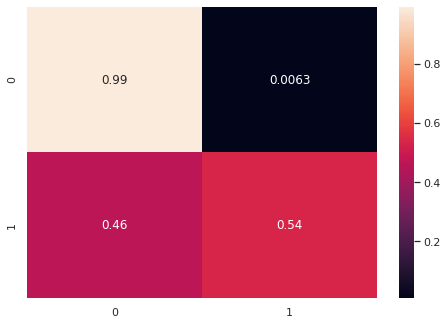

In [ ]:
y_pred, y_test = evaluate_model(X_scaled, Y)

# Accuracy Score
boosting_accuracy = accuracy_score(y_test, y_pred)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(boosting_accuracy*100,2), "%")

# Classification Report
report = classification_report(y_test, y_pred)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(confusion_matrix_heatmap, annot=True)

<center>
    <br>
        <br>
            <br>
                <h5 style = "color:blue">====================================================================</h5>
                <h2 style = "color:green">Hyper Parameter Tuning</h2>
                <h5 style = "color:green">Training Classifiers using Hyperparameter Optimization as Genetic Algorithms</h5>
                <h5 style = "color:blue">====================================================================</h5>
            <br>
        <br>
    <br>
</center>

In [ ]:
# Hyper Parameter Tunning  --- Gradient Boosting

x_all, y_all = pipeline.fit_resample(X_scaled, Y)

# Number of Trees
n_estimators = [100, 200, 1000]

# learning Rate
learning_rate = [0.1, 0.01, 0.001]


# Create the random grid
param1 = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
}

print(param1)

clf1 = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.GradientBoostingClassifier': param1}, 
                                 cv = 4, scoring = 'accuracy')

clf1.fit(x_all, y_all)
clf1.export('tpot_digits_pipeline.py')

{'n_estimators': [100, 200, 1000], 'learning_rate': [0.1, 0.01, 0.001]}


Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9863731656184487

Generation 2 - Current best internal CV score: 0.9863731656184487

Generation 3 - Current best internal CV score: 0.9863731656184487

Generation 4 - Current best internal CV score: 0.9863731656184487

Generation 5 - Current best internal CV score: 0.9863731656184487

Best pipeline: GradientBoostingClassifier(CombineDFs(input_matrix, input_matrix), learning_rate=0.1, n_estimators=100)



=============================================================== <br>
**the best:** <br>
GradientBoostingClassifier(learning_rate=0.1 n_estimators=100) <br>
=============================================================== <br>

In [ ]:
def evaluate_model_optimised(data_x, data_y):
    k_fold = model_selection.KFold(n_splits = 4)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        # kfold
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        # oversampling
        train_x, train_y = pipeline.fit_resample(train_x, train_y)
        test_x, test_y = pipeline.fit_resample(test_x, test_y)

        # Hyper Parameter Tunning

        # Number of Trees
        n_estimators = [100, 200, 1000]

        # learning Rate
        learning_rate = [0.1, 0.01, 0.001]

        # Create the random grid
        param1 = {'n_estimators': n_estimators,
                      'learning_rate': learning_rate
        }

        clf1 = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                        verbosity= 2, early_stop= 12,
                                        config_dict={'sklearn.ensemble.BaggingClassifier': param1}, 
                                        scoring = 'accuracy')

        # Fit, Predict
        clf1.fit(train_x, train_y)
        y_pred = clf1.predict(test_x)

        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, test_y)

    return predicted_targets, actual_targets

In [ ]:
y_pred, y_test = evaluate_model_optimised(X_scaled, Y)

# Accuracy Score
accuracy_clf1 = accuracy_score(y_test, y_pred)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(accuracy_clf1*100,2), "%")

# Classification Report
report = classification_report(y_test, y_pred)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(confusion_matrix_heatmap, annot=True)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -inf


TypeError: ignored

# (2) Boosting

In [ ]:
# Boosting

kfold = model_selection.KFold(n_splits = 5)

num_trees = 100
boosting_model = AdaBoostClassifier(n_estimators=num_trees)
boosting_results = model_selection.cross_val_score(boosting_model, X_train, y_train, cv=kfold)
boosting_results = boosting_results.mean()
print("\n\nMean Score of Boosting:")
print("======================\n")
print(boosting_results)
print("\n======================\n")



Mean Score of Boosting:

0.9770034843205575




### Evaluate the Performace of Boosting



Accuracy Score:


  Accuracy:  90.66 %


Classification Report:


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       314
           1       0.98      0.73      0.84       157

    accuracy                           0.91       471
   macro avg       0.93      0.86      0.89       471
weighted avg       0.92      0.91      0.90       471



Confusion Matrix:


[[312   2]
 [ 42 115]]


Confusion Matrix with Heat MAP:




<AxesSubplot:>

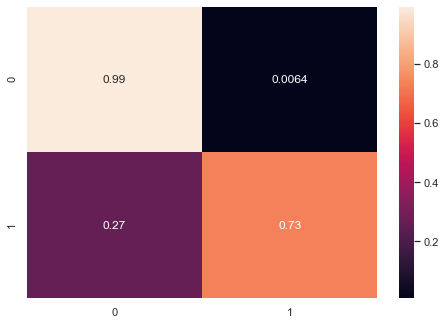

In [ ]:
# Predictions
boosting_model.fit(X_train, y_train)
y_pred = boosting_model.predict(X_test)

# Accuracy Score
boosting_accuracy = accuracy_score(y_test, y_pred)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(boosting_accuracy*100,2), "%")

# Classification Report
report = classification_report(y_test, y_pred)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(confusion_matrix_heatmap, annot=True)

# (3) Voting Classifier

In [ ]:
# Voting Ensemble for Classification

kfold = model_selection.KFold(n_splits = 5)

# Create the Sub Models
estimators = []
m1 = LogisticRegression()
estimators.append(('logistic', m1))

m2 = DecisionTreeClassifier()
estimators.append(('cart', m2))

# m3 = SVC()
# estimators.append(('svm', m3))
m3 = GradientBoostingClassifier()
estimators.append(('gb', m3))


# Create the Ensemble Model
ensemble = VotingClassifier(estimators)
ensemble_results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)


ensemble_results = ensemble_results.mean()
print("\n\nMean Score of Voting Classifier:")
print("================================\n")
print(ensemble_results)
print("\n================================\n")

report = classification_report(y_test, y_pred)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)



Mean Score of Voting Classifier:

0.9741842499711749




Classification Report:


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       161
           1       1.00      0.67      0.80         3

    accuracy                           0.99       164
   macro avg       1.00      0.83      0.90       164
weighted avg       0.99      0.99      0.99       164



### Evalute the performace of Voting Classifier



Accuracy Score:


  Accuracy:  98.78 %


Classification Report:


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.33      0.50         3

    accuracy                           0.99       164
   macro avg       0.99      0.67      0.75       164
weighted avg       0.99      0.99      0.98       164



Confusion Matrix:


[[161   0]
 [  2   1]]


Confusion Matrix with Heat MAP:




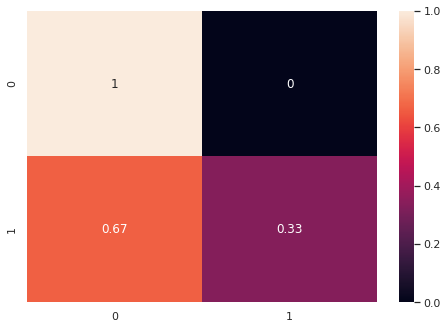

In [ ]:
# Predictions
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

# Accuracy Score
ensemble_accuracy = accuracy_score(y_test, y_pred)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(ensemble_accuracy*100,2), "%")

# Classification Report
report = classification_report(y_test, y_pred)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(confusion_matrix_heatmap, annot=True)

<center>
    <br>
        <br>
            <br>
                <h5 style = "color:blue">====================================================================</h5>
                <h2 style = "color:green">Hyper Parameter Tuning</h2>
                <h5 style = "color:green">Training Classifiers using Hyperparameter Optimization as Genetic Algorithms</h5>
                <h5 style = "color:blue">====================================================================</h5>
            <br>
        <br>
    <br>
</center>

<div class="alert alert-info">
<b>We have Trainined the following 3 Machine Learning Models after Hyper Parameters Tuning</b>
<div class="alert alert-success">
<b>
    <code>(1)</code> Gradient Boost Classifier <br>
    <code>(2)</code> Decision Tree Classifier <br>
    <code>(3)</code> Ada Boost Classifier <br>  
</b>
</div>
</div>

# (1) Gradient Boost Classifier

In [ ]:
# Hyper Parameter Tunning

# Number of Trees
n_estimators = [100, 200, 1000]

# learning Rate
learning_rate = [0.1, 0.01, 0.001]


# Create the random grid
param1 = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
}

print(param1)

clf1 = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.GradientBoostingClassifier': param1}, 
                                 cv = 2, scoring = 'accuracy')
clf1.fit(X_train, y_train)

{'n_estimators': [100, 200, 1000], 'learning_rate': [0.1, 0.01, 0.001]}


Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9748641304347826

Generation 2 - Current best internal CV score: 0.9762228260869565

Generation 3 - Current best internal CV score: 0.9762228260869565

Generation 4 - Current best internal CV score: 0.9762228260869565

Generation 5 - Current best internal CV score: 0.9762228260869565

Best pipeline: GradientBoostingClassifier(CombineDFs(GradientBoostingClassifier(input_matrix, learning_rate=0.01, n_estimators=100), input_matrix), learning_rate=0.001, n_estimators=1000)


TPOTClassifier(config_dict={'sklearn.ensemble.GradientBoostingClassifier': {'learning_rate': [0.1,
                                                                                              0.01,
                                                                                              0.001],
                                                                            'n_estimators': [100,
                                                                                             200,
                                                                                             1000]}},
               crossover_rate=0.1, cv=2, disable_update_check=False,
               early_stop=12, generations=5, log_file=None,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=12,
               periodic_checkpoint_folder=None, population_size=24,
               random_state=None, scoring='accuracy', subsample=1.0,
  

### Evaluate the Performace of Gradient Boost Classifier after Parameter Tunning



Accuracy Score:


  Accuracy:  99.39 %


Classification Report:


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       161
           1       1.00      0.67      0.80         3

    accuracy                           0.99       164
   macro avg       1.00      0.83      0.90       164
weighted avg       0.99      0.99      0.99       164



Confusion Matrix:


[[161   0]
 [  1   2]]


Confusion Matrix with Heat MAP:




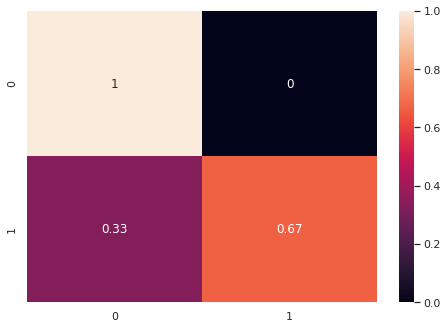

In [ ]:
# Predictions
y_pred = clf1.predict(X_test)

# Accuracy Score
accuracy_clf1 = accuracy_score(y_test, y_pred)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(accuracy_clf1*100,2), "%")

# Classification Report
report = classification_report(y_test, y_pred)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(confusion_matrix_heatmap, annot=True)

# (2) Decision Tree Classifier

In [ ]:
# Hyper Parameter Tunning

# Number of features to consider at every split
splitter = ['best', 'random']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 500,2)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

param2 = {
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

print(param2)

clf2 = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.tree.DecisionTreeClassifier': param2}, 
                                 cv = 4, scoring = 'accuracy')
clf2.fit(X_train, y_train)

{'splitter': ['best', 'random'], 'max_depth': [10, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['entropy', 'gini']}


Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9630452373912637

Generation 2 - Current best internal CV score: 0.9679276699708999

Generation 3 - Current best internal CV score: 0.9679276699708999

Generation 4 - Current best internal CV score: 0.9679276699708999

Generation 5 - Current best internal CV score: 0.9679276699708999

Best pipeline: DecisionTreeClassifier(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=500, min_samples_leaf=4, min_samples_split=2, splitter=best), criterion=entropy, max_depth=500, min_samples_leaf=2, min_samples_split=10, splitter=random)


TPOTClassifier(config_dict={'sklearn.tree.DecisionTreeClassifier': {'criterion': ['entropy',
                                                                                  'gini'],
                                                                    'max_depth': [10,
                                                                                  500],
                                                                    'min_samples_leaf': [1,
                                                                                         2,
                                                                                         4],
                                                                    'min_samples_split': [2,
                                                                                          5,
                                                                                          10],
                                                                    'splitter': ['be

### Evaluate the Performace of Decision Tree Classifier after Parameter Tunning



Accuracy Score:


  Accuracy:  90.87 %


Classification Report:


              precision    recall  f1-score   support

           0       0.90      0.97      0.93       314
           1       0.93      0.78      0.85       157

    accuracy                           0.91       471
   macro avg       0.92      0.88      0.89       471
weighted avg       0.91      0.91      0.91       471



Confusion Matrix:


[[305   9]
 [ 34 123]]


Confusion Matrix with Heat MAP:




<AxesSubplot:>

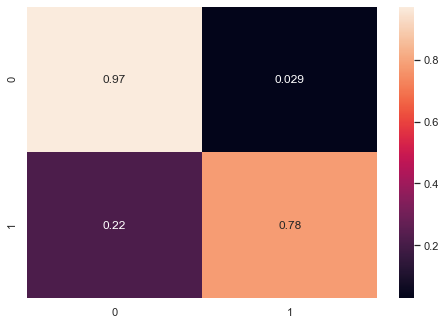

In [ ]:
# Predictions
y_pred = clf2.predict(X_test)

# Accuracy Score
accuracy_clf2 = accuracy_score(y_test, y_pred)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(accuracy_clf2*100,2), "%")

# Classification Report
report = classification_report(y_test, y_pred)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(confusion_matrix_heatmap, annot=True)

# (3) Ada Boost Classifier

In [ ]:
param3 = {'n_estimators':[50, 100, 200],
          'learning_rate':[1, 0.1],
          'algorithm':['SAMME', 'SAMME.R']
          }
print(param3)

clf3 = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.AdaBoostClassifier': param3}, 
                                 cv = 2, scoring = 'accuracy')
clf3.fit(X_train, y_train)

{'n_estimators': [50, 100, 200], 'learning_rate': [1, 0.1], 'algorithm': ['SAMME', 'SAMME.R']}


Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9811715481171548

Generation 2 - Current best internal CV score: 0.9811715481171548

Generation 3 - Current best internal CV score: 0.9811715481171548

Generation 4 - Current best internal CV score: 0.9811715481171548

Generation 5 - Current best internal CV score: 0.9811715481171548

Best pipeline: AdaBoostClassifier(CombineDFs(input_matrix, input_matrix), algorithm=SAMME.R, learning_rate=0.1, n_estimators=200)


TPOTClassifier(config_dict={'sklearn.ensemble.AdaBoostClassifier': {'algorithm': ['SAMME',
                                                                                  'SAMME.R'],
                                                                    'learning_rate': [1,
                                                                                      0.1],
                                                                    'n_estimators': [50,
                                                                                     100,
                                                                                     200]}},
               cv=2, early_stop=12, generations=5, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity=2)

### Evaluate the Performace of Ada Boost Classifier after Parameter Tunning



Accuracy Score:


  Accuracy:  89.81 %


Classification Report:


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       314
           1       0.97      0.71      0.82       157

    accuracy                           0.90       471
   macro avg       0.92      0.85      0.88       471
weighted avg       0.91      0.90      0.89       471



Confusion Matrix:


[[311   3]
 [ 45 112]]


Confusion Matrix with Heat MAP:




<AxesSubplot:>

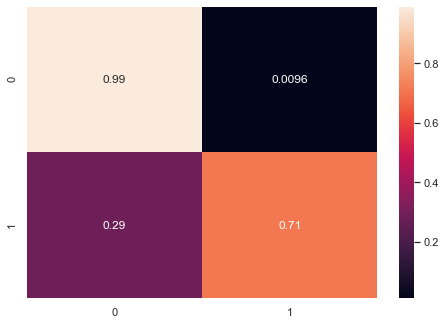

In [ ]:
# Predictions
y_pred = clf3.predict(X_test)

# Accuracy Score
accuracy_clf3 = accuracy_score(y_test, y_pred)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(accuracy_clf3*100,2), "%")

# Classification Report
report = classification_report(y_test, y_pred)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(confusion_matrix_heatmap, annot=True)

<center>
    <br>
        <br>
            <br>
                <h5 style = "color:blue">====================================================================</h5>
                <h2 style = "color:green">Bayesian Optimization</h2>
                <h5 style = "color:blue">====================================================================</h5>
            <br>
        <br>
    <br>
</center>

<div class="alert alert-info">
<b>We have Trainined the following 3 Machine Learning Models with Bayesian Optimization</b>
<div class="alert alert-success">
<b>
    <code>(1)</code> Gradient Boost Classifier <br>
    <code>(2)</code> Decision Tree Classifier <br>
    <code>(3)</code> Ada Boost Classifier <br>  
</b>
</div>
</div>

In [ ]:
!pip install hyperopt
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

# (1) Gradient Boost Classifier

In [ ]:
# Training Classifiers
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

space = {'criterion': hp.choice('criterion', ['friedman_mse', 'mse']),
        'max_depth': hp.choice('max_depth', [3, 5]),
        'max_features': hp.choice('max_features', ['auto', None]),
        'n_estimators' : hp.choice('n_estimators', [100, 200])
    }

def objective(space):
    model = GradientBoostingClassifier(criterion = space['criterion'],
                                   max_depth = space['max_depth'],
                                   max_features = space['max_features'],
                                   n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 2).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|███████████████████████████████████████████████| 80/80 [20:06<00:00, 15.08s/trial, best loss: -0.9965132496513249]


{'criterion': 1, 'max_depth': 1, 'max_features': 0, 'n_estimators': 1}

In [ ]:
crit = {0: 'friedman_mse', 1: 'mse'}
dep = {0: 3, 1: 5}
feat = {0: 'auto', 1: None}
est = {0: 100, 1: 200}

clf1 = GradientBoostingClassifier(criterion = crit[best['criterion']],
                              max_depth = dep[best['max_depth']], 
                              max_features = feat[best['max_features']], 
                              n_estimators = est[best['n_estimators']]).fit(X_train, y_train)

### Evaluate the Performace of Gradient Boost Classifier with Bayesian Optimization



Accuracy Score:


  Accuracy:  90.02 %


Classification Report:


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       314
           1       1.00      0.70      0.82       157

    accuracy                           0.90       471
   macro avg       0.93      0.85      0.88       471
weighted avg       0.91      0.90      0.89       471



Confusion Matrix:


[[314   0]
 [ 47 110]]


Confusion Matrix with Heat MAP:




<AxesSubplot:>

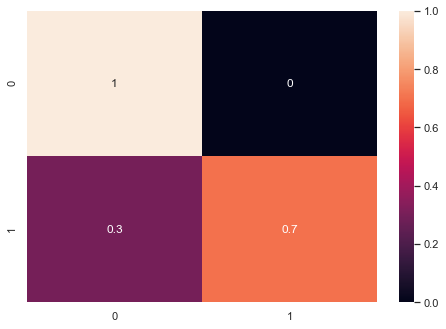

In [ ]:
# Predictions
y_pred = clf1.predict(X_test)

# Accuracy Score
accuracy_clf1b = accuracy_score(y_test, y_pred)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(accuracy_clf1b*100,2), "%")

# Classification Report
report = classification_report(y_test, y_pred)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(confusion_matrix_heatmap, annot=True)

# (2) Decision Tree Classifier

In [ ]:
# Training Classifiers

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'splitter': hp.choice('splitter', ['best', 'random']),
        'max_features': hp.choice('max_features', ['auto', None])
    }

def objective(space):
    model = DecisionTreeClassifier(criterion = space['criterion'],
                                   splitter = space['splitter'],
                                   max_features = space['max_features']
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 2).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|███████████████████████████████████████████████| 80/80 [00:08<00:00,  8.93trial/s, best loss: -0.9602510460251046]


{'criterion': 0, 'max_features': 1, 'splitter': 0}

In [ ]:
crit = {0: 'entropy', 1: 'gini'}
split = {0: 'best', 1: 'random'}
feat = {0: 'auto', 1: None}

clf1 = DecisionTreeClassifier(criterion = crit[best['criterion']],
                              splitter = split[best['splitter']], 
                              max_features = feat[best['max_features']]).fit(X_train, y_train)

### Evaluate the Performace of Decision Tree Classifier with Bayesian Optimization



Accuracy Score:


  Accuracy:  90.02 %


Classification Report:


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       314
           1       0.90      0.79      0.84       157

    accuracy                           0.90       471
   macro avg       0.90      0.87      0.88       471
weighted avg       0.90      0.90      0.90       471



Confusion Matrix:


[[300  14]
 [ 33 124]]


Confusion Matrix with Heat MAP:




<AxesSubplot:>

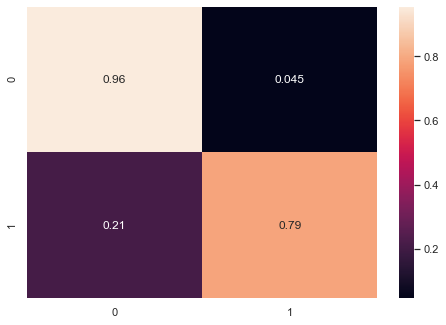

In [ ]:
# Predictions
y_pred = clf1.predict(X_test)

# Accuracy Score
accuracy_clf2b = accuracy_score(y_test, y_pred)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(accuracy_clf2b*100,2), "%")

# Classification Report
report = classification_report(y_test, y_pred)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(confusion_matrix_heatmap, annot=True)

# (3) Ada Boost Classifier

In [ ]:
# Training Classifiers

space = {'n_estimators': hp.choice('n_estimators', [50, 100, 200]),
        'learning_rate': hp.choice('learning_rate', [1, 0.1]),
        'algorithm': hp.choice('algorithm', ['SAMME', 'SAMME.R'])
    }

def objective(space):
    model = AdaBoostClassifier(n_estimators = space['n_estimators'],
                                   learning_rate = space['learning_rate'],
                                   algorithm = space['algorithm']
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 2).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|███████████████████████████████████████████████| 80/80 [05:31<00:00,  4.14s/trial, best loss: -0.9811715481171548]


{'algorithm': 1, 'learning_rate': 0, 'n_estimators': 2}

In [ ]:
n_est = {0: 50, 1: 100, 2:200}
lear = {0: 1, 1: 0.1}
algo = {0: 'SAMME', 1: 'SAMME.R'}

clf1 = AdaBoostClassifier(n_estimators = n_est[best['n_estimators']],
                              learning_rate = lear[best['learning_rate']], 
                              algorithm = algo[best['algorithm']]).fit(X_train, y_train)

### Evaluate the Performace of Ada Boost Classifier with Bayesian Optimization



Accuracy Score:


  Accuracy:  86.62 %


Classification Report:


              precision    recall  f1-score   support

           0       0.83      1.00      0.91       314
           1       0.99      0.61      0.75       157

    accuracy                           0.87       471
   macro avg       0.91      0.80      0.83       471
weighted avg       0.89      0.87      0.86       471



Confusion Matrix:


[[313   1]
 [ 62  95]]


Confusion Matrix with Heat MAP:




<AxesSubplot:>

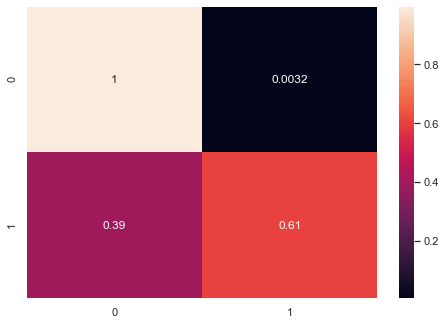

In [ ]:
# Predictions
y_pred = clf1.predict(X_test)

# Accuracy Score
accuracy_clf3b = accuracy_score(y_test, y_pred)
print("\n\n======================")
print("Accuracy Score:")
print("======================\n\n")
print("  Accuracy: ", round(accuracy_clf3b*100,2), "%")

# Classification Report
report = classification_report(y_test, y_pred)
print("\n\n======================")
print("Classification Report:")
print("======================\n\n")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("\n\n=================")
print("Confusion Matrix:")
print("=================\n\n")
print(matrix)

# Heat Map
print("\n\n===============================")
print("Confusion Matrix with Heat MAP:")
print("===============================\n\n")
confusion_matrix_heatmap = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(confusion_matrix_heatmap, annot=True)

<center>
    <br>
        <br>
            <br>
                <h5 style = "color:blue">====================================================================</h5>
                <h2 style = "color:green">Comparision of all Models</h2>
                <h5 style = "color:blue">====================================================================</h5>
            <br>
        <br>
    <br>
</center>

In [ ]:
print("\n\n===================================================")
print("       Performance of Machine Learning Models")
print("===================================================\n")

x=PrettyTable()
x.add_column("Model Name",['Decision Tree Classifier',
                            'Random Forest Classifier',
                            'Support Vector Classifier',
                            'Logistic Regression',
                            'Discriminant Analysis',
                            ' KNearest Neighbors Classifier ',
                            'Gradient Boosting Classifier',
                            'Naive Bayes Classifier'])

x.add_column("Accuracy Score",["  " + str(round(num * 100, 2)) + " % " for num in mean_accuracy])
print(x)

print("\n\n===================================================")
print("          Performance of Ensemble Methods")
print("===================================================\n")

x=PrettyTable()
x.add_column("Model Name",['      Bagging Classifier       ',
                            'Boosting Classifier',
                            'Voting Classifier'])

x.add_column("Accuracy Score",["  " + str(round(bagging_accuracy * 100 , 2)) + " % ", 
                               "  " + str(round(boosting_accuracy * 100 , 2)) + " % ",
                               "  " + str(round(ensemble_accuracy * 100 , 2)) + " % "])
print(x)

print("\n\n===================================================")
print("Performance of Models After Hyper Parameters Tuning")
print("===================================================\n")

x=PrettyTable()
x.add_column("Model Name",['Gradient Boost Classifier',
                            'Random Forest Classifier',
                            ' Ada Boost Classifier '])

x.add_column("Accuracy with Genetic Algorithm (TPOT)",["  " + str(round(accuracy_clf1 * 100 , 2)) + " % ", 
                               "  " + str(round(accuracy_clf2 * 100 , 2)) + " % ", 
                               "  " + str(round(accuracy_clf3 * 100 , 2)) + " % "])

x.add_column("Accuracy with Bayesian Optimization",["  " + str(round(accuracy_clf1b * 100 , 2)) + " % ", 
                               "  " + str(round(accuracy_clf2b * 100 , 2)) + " % ", 
                               "  " + str(round(accuracy_clf3b * 100 , 2)) + " % "])
print(x)



       Performance of Machine Learning Models

+---------------------------------+----------------+
|            Model Name           | Accuracy Score |
+---------------------------------+----------------+
|     Decision Tree Classifier    |     81.66 %    |
|     Random Forest Classifier    |     76.75 %    |
|    Support Vector Classifier    |     71.64 %    |
|       Logistic Regression       |     72.74 %    |
|      Discriminant Analysis      |     75.11 %    |
|  KNearest Neighbors Classifier  |     35.07 %    |
|   Gradient Boosting Classifier  |     88.48 %    |
|      Naive Bayes Classifier     |     79.22 %    |
+---------------------------------+----------------+


          Performance of Ensemble Methods

+---------------------------------+----------------+
|            Model Name           | Accuracy Score |
+---------------------------------+----------------+
|       Bagging Classifier        |     88.11 %    |
|       Boosting Classifier       |     90.66 %    |
|    